C:\Users\a4293604\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔍 Multi-LLM Bias Screening Framework
Device: cpu
📊 Models to test: 10
  • word2vec: Google News Word2Vec 300d
  • glove: GloVe Wiki+Gigaword 300d
  • fasttext: FastText Wiki-News 300d
  • distilbert: DistilBERT Base Uncased
  • roberta: RoBERTa Base
  • albert: ALBERT Base v2
  • gpt2: GPT-2 Base
  • distilgpt2: DistilGPT-2
  • xlnet: XLNet Base
  • electra: ELECTRA Small
🔍 STARTING MULTI-MODEL BIAS SCREENING

📊 Testing word2vec: Google News Word2Vec 300d
  Loading static model...
  Running quick WEAT test...
  ✅ Effect size: 0.066270

📊 Testing glove: GloVe Wiki+Gigaword 300d
  Loading static model...
[==================================================] 100.0% 376.1/376.1MB downloaded
  Running quick WEAT test...
  ✅ Effect size: 0.231846

📊 Testing fasttext: FastText Wiki-News 300d
  Loading static model...
[==================================================] 100.0% 958.5/958.4MB downloaded
  Running quick WEAT test...
  ✅ Effect size: 0.082018

📊 Testing distilbert: DistilBERT Base 

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


  Running quick WEAT test...
  ✅ Effect size: -0.001660

📊 Testing roberta: RoBERTa Base
  Loading transformer model...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  Running quick WEAT test...
  ✅ Effect size: 0.042488

📊 Testing albert: ALBERT Base v2
  Loading transformer model...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


  Running quick WEAT test...
  ✅ Effect size: -0.130533

📊 Testing gpt2: GPT-2 Base
  Loading transformer model...
  Running quick WEAT test...
  ✅ Effect size: 0.000000

📊 Testing distilgpt2: DistilGPT-2
  Loading transformer model...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


  Running quick WEAT test...
  ✅ Effect size: 0.000000

📊 Testing xlnet: XLNet Base
  Loading transformer model...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


  Running quick WEAT test...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


  ✅ Effect size: 6.278259

📊 Testing electra: ELECTRA Small
  Loading transformer model...
  Running quick WEAT test...
  ✅ Effect size: -0.003098

📊 BIAS SCREENING RESULTS ANALYSIS
🏆 BIAS RANKING (Highest to Lowest):
--------------------------------------------------
  10. xlnet        | 6.278259 | 🔴 Strong
      XLNet Base
   9. glove        | 0.231846 | 🔴 Strong
      GloVe Wiki+Gigaword 300d
   8. albert       | -0.130533 | 🔴 Strong
      ALBERT Base v2
   7. fasttext     | 0.082018 | 🔴 Strong
      FastText Wiki-News 300d
   6. word2vec     | 0.066270 | 🔴 Strong
      Google News Word2Vec 300d
   5. roberta      | 0.042488 | 🟡 Moderate
      RoBERTa Base
   4. electra      | -0.003098 | 🟢 Weak
      ELECTRA Small
   3. distilbert   | -0.001660 | 🟢 Weak
      DistilBERT Base Uncased
   2. gpt2         | 0.000000 | 🟢 Weak
      GPT-2 Base
   1. distilgpt2   | 0.000000 | 🟢 Weak
      DistilGPT-2

🎯 MITIGATION CANDIDATES:
------------------------------
🔴 EXCELLENT (Strong Bias):
  • x

ValueError: Invalid format specifier

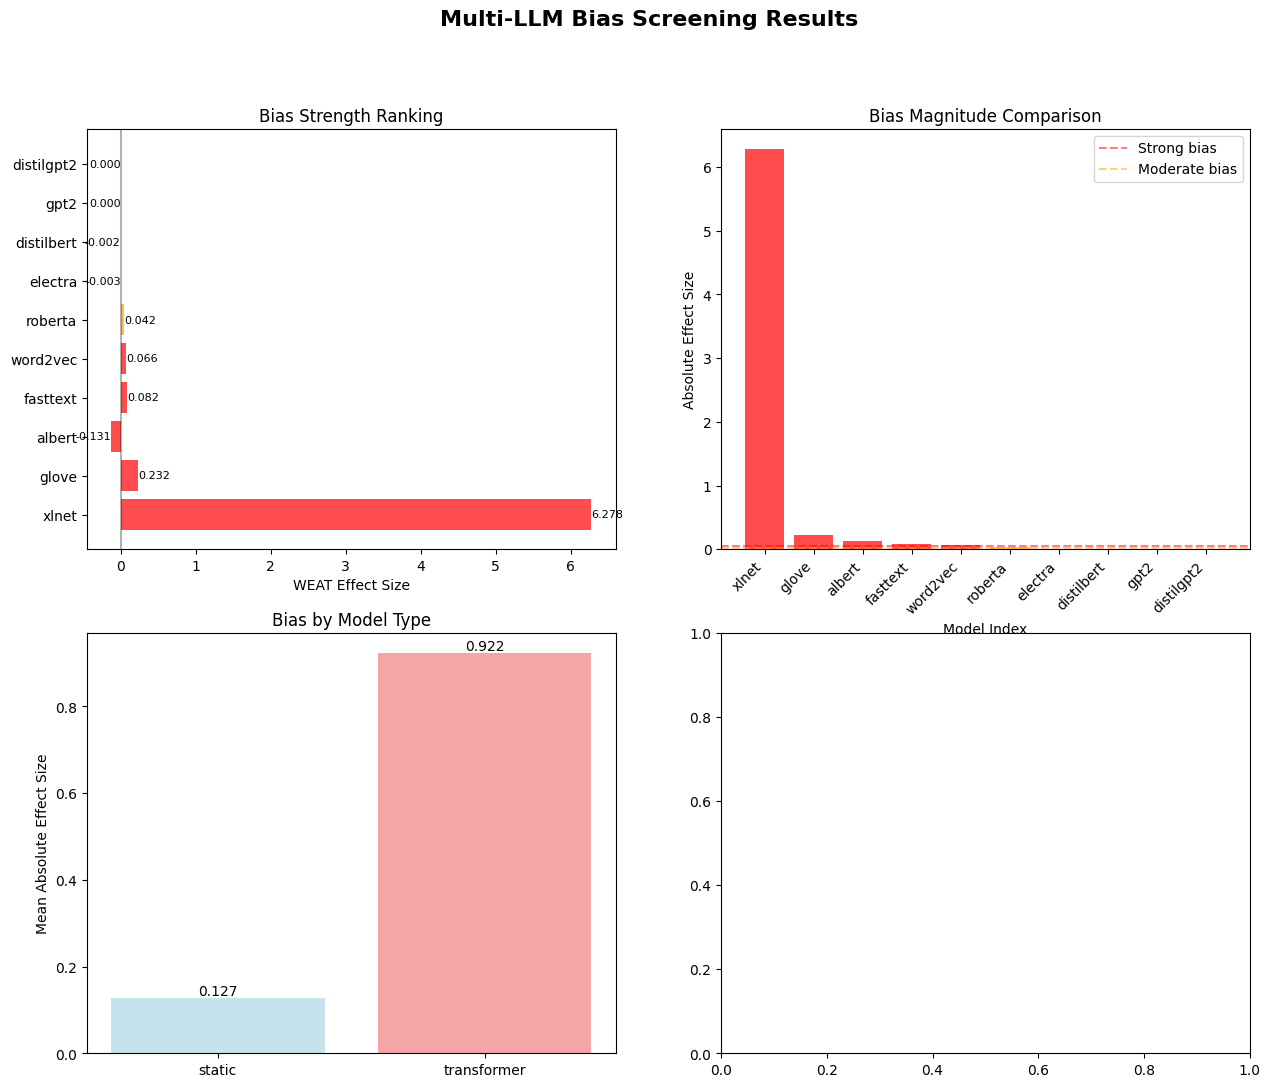

In [1]:
# %% [markdown]
# # Multi-LLM Bias Screening Framework
# 
# **Goal**: Quickly test bias across multiple models to find the best candidate for mitigation
# **Strategy**: Fast SEAT tests on various models to identify strongest bias baseline
# 
# ## Models to Test:
# 1. **Static Embeddings**: Word2Vec, GloVe, FastText
# 2. **Early Transformers**: DistilBERT, RoBERTa-base, ALBERT
# 3. **GPT Family**: GPT-2, DistilGPT-2
# 4. **Alternative Models**: XLNet, ELECTRA
# 5. **Older Models**: ELMo (if available)

# %%
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gensim.downloader as api
from transformers import (
    AutoTokenizer, AutoModel, AutoModelForSequenceClassification,
    GPT2Tokenizer, GPT2Model,
    DistilBertTokenizer, DistilBertModel,
    RobertaTokenizer, RobertaModel,
    AlbertTokenizer, AlbertModel,
    XLNetTokenizer, XLNetModel,
    ElectraTokenizer, ElectraModel
)
import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
plt.style.use('default')

print(f"🔍 Multi-LLM Bias Screening Framework")
print(f"Device: {device}")

# %%
# Quick bias testing wordlists (smaller for speed)
QUICK_BIAS_WORDLISTS = {
    'male_names': ['james', 'john', 'robert', 'michael', 'william', 'david'],
    'female_names': ['mary', 'patricia', 'jennifer', 'linda', 'elizabeth', 'barbara'],
    'career_words': ['engineer', 'ceo', 'surgeon', 'executive', 'scientist', 'lawyer'],
    'family_words': ['homemaker', 'caregiver', 'mother', 'nurturing', 'domestic', 'caring']
}

# Model configurations for testing
MODEL_CONFIGS = {
    # Static Embeddings (fastest)
    'word2vec': {
        'type': 'static',
        'load_func': lambda: api.load('word2vec-google-news-300'),
        'description': 'Google News Word2Vec 300d'
    },
    'glove': {
        'type': 'static', 
        'load_func': lambda: api.load('glove-wiki-gigaword-300'),
        'description': 'GloVe Wiki+Gigaword 300d'
    },
    'fasttext': {
        'type': 'static',
        'load_func': lambda: api.load('fasttext-wiki-news-subwords-300'),
        'description': 'FastText Wiki-News 300d'
    },
    
    # Transformer Models
    'distilbert': {
        'type': 'transformer',
        'model_name': 'distilbert-base-uncased',
        'description': 'DistilBERT Base Uncased'
    },
    'roberta': {
        'type': 'transformer', 
        'model_name': 'roberta-base',
        'description': 'RoBERTa Base'
    },
    'albert': {
        'type': 'transformer',
        'model_name': 'albert-base-v2', 
        'description': 'ALBERT Base v2'
    },
    'gpt2': {
        'type': 'transformer',
        'model_name': 'gpt2',
        'description': 'GPT-2 Base'
    },
    'distilgpt2': {
        'type': 'transformer',
        'model_name': 'distilgpt2',
        'description': 'DistilGPT-2'
    },
    'xlnet': {
        'type': 'transformer',
        'model_name': 'xlnet-base-cased',
        'description': 'XLNet Base'
    },
    'electra': {
        'type': 'transformer',
        'model_name': 'google/electra-small-discriminator',
        'description': 'ELECTRA Small'
    }
}

print(f"📊 Models to test: {len(MODEL_CONFIGS)}")
for name, config in MODEL_CONFIGS.items():
    print(f"  • {name}: {config['description']}")

# %%
# Fast embedding extraction functions
def get_static_embedding(word, model):
    """Get embedding from static model (Word2Vec, GloVe, etc.)"""
    try:
        if hasattr(model, 'wv'):
            return model.wv[word]
        else:
            return model[word]
    except (KeyError, AttributeError):
        return None

def get_transformer_embedding(text, tokenizer, model, pooling='cls'):
    """Get embedding from transformer model"""
    try:
        inputs = tokenizer(text, return_tensors='pt', padding=True, 
                          truncation=True, max_length=64)  # Short for speed
        inputs = {k: v.to(device) for k, v in inputs.items()}
        
        with torch.no_grad():
            outputs = model(**inputs)
            
            if pooling == 'cls':
                # Use CLS token
                embedding = outputs.last_hidden_state[0][0]
            else:
                # Mean pooling
                embeddings = outputs.last_hidden_state[0]
                attention_mask = inputs['attention_mask'][0]
                masked_embeddings = embeddings * attention_mask.unsqueeze(-1).float()
                embedding = torch.mean(masked_embeddings, dim=0)
            
        return embedding.cpu().numpy()
    except Exception as e:
        print(f"Error getting embedding: {e}")
        return None

def cosine_similarity_fast(vec1, vec2):
    """Fast cosine similarity calculation"""
    if vec1 is None or vec2 is None:
        return 0
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# %%
# Quick WEAT test for screening
def quick_weat_test(model, model_type, tokenizer=None):
    """Fast WEAT test for initial bias screening"""
    
    male_names = QUICK_BIAS_WORDLISTS['male_names']
    female_names = QUICK_BIAS_WORDLISTS['female_names']
    career_words = QUICK_BIAS_WORDLISTS['career_words']
    family_words = QUICK_BIAS_WORDLISTS['family_words']
    
    similarities = {
        'male_career': [],
        'male_family': [],
        'female_career': [],
        'female_family': []
    }
    
    if model_type == 'static':
        # Static embeddings - direct word associations
        for male_name in male_names:
            male_vec = get_static_embedding(male_name, model)
            if male_vec is None:
                continue
                
            # Career similarities
            career_sims = []
            for career in career_words:
                career_vec = get_static_embedding(career, model)
                if career_vec is not None:
                    career_sims.append(cosine_similarity_fast(male_vec, career_vec))
            if career_sims:
                similarities['male_career'].append(np.mean(career_sims))
            
            # Family similarities
            family_sims = []
            for family in family_words:
                family_vec = get_static_embedding(family, model)
                if family_vec is not None:
                    family_sims.append(cosine_similarity_fast(male_vec, family_vec))
            if family_sims:
                similarities['male_family'].append(np.mean(family_sims))
        
        for female_name in female_names:
            female_vec = get_static_embedding(female_name, model)
            if female_vec is None:
                continue
                
            # Career similarities
            career_sims = []
            for career in career_words:
                career_vec = get_static_embedding(career, model)
                if career_vec is not None:
                    career_sims.append(cosine_similarity_fast(female_vec, career_vec))
            if career_sims:
                similarities['female_career'].append(np.mean(career_sims))
            
            # Family similarities
            family_sims = []
            for family in family_words:
                family_vec = get_static_embedding(family, model)
                if family_vec is not None:
                    family_sims.append(cosine_similarity_fast(female_vec, family_vec))
            if family_sims:
                similarities['female_family'].append(np.mean(family_sims))
    
    else:  # Transformer models - sentence-based SEAT
        # Male names in career/family contexts
        for male_name in male_names:
            # Career contexts
            career_sims = []
            for career in career_words:
                sentence = f"{male_name.title()} is a {career}."
                embedding = get_transformer_embedding(sentence, tokenizer, model)
                if embedding is not None:
                    career_sims.append(np.linalg.norm(embedding))  # Simple magnitude as proxy
            if career_sims:
                similarities['male_career'].append(np.mean(career_sims))
            
            # Family contexts
            family_sims = []
            for family in family_words:
                sentence = f"{male_name.title()} is {family}."
                embedding = get_transformer_embedding(sentence, tokenizer, model)
                if embedding is not None:
                    family_sims.append(np.linalg.norm(embedding))
            if family_sims:
                similarities['male_family'].append(np.mean(family_sims))
        
        # Female names in career/family contexts
        for female_name in female_names:
            # Career contexts
            career_sims = []
            for career in career_words:
                sentence = f"{female_name.title()} is a {career}."
                embedding = get_transformer_embedding(sentence, tokenizer, model)
                if embedding is not None:
                    career_sims.append(np.linalg.norm(embedding))
            if career_sims:
                similarities['female_career'].append(np.mean(career_sims))
            
            # Family contexts
            family_sims = []
            for family in family_words:
                sentence = f"{female_name.title()} is {family}."
                embedding = get_transformer_embedding(sentence, tokenizer, model)
                if embedding is not None:
                    family_sims.append(np.linalg.norm(embedding))
            if family_sims:
                similarities['female_family'].append(np.mean(family_sims))
    
    # Calculate WEAT effect size
    means = {key: np.mean(values) if values else 0 for key, values in similarities.items()}
    
    effect_size = (means['male_career'] - means['male_family']) - \
                 (means['female_career'] - means['female_family'])
    
    return {
        'effect_size': effect_size,
        'means': means,
        'sample_sizes': {key: len(values) for key, values in similarities.items()}
    }

# %%
# Bias screening runner
def run_bias_screening():
    """Run quick bias screening across all models"""
    
    print("🔍 STARTING MULTI-MODEL BIAS SCREENING")
    print("=" * 60)
    
    results = {}
    
    for model_name, config in MODEL_CONFIGS.items():
        print(f"\n📊 Testing {model_name}: {config['description']}")
        
        try:
            if config['type'] == 'static':
                # Load static embedding model
                print("  Loading static model...")
                model = config['load_func']()
                tokenizer = None
                
            else:  # Transformer
                # Load transformer model
                print("  Loading transformer model...")
                model_name_hf = config['model_name']
                
                tokenizer = AutoTokenizer.from_pretrained(model_name_hf)
                model = AutoModel.from_pretrained(model_name_hf)
                
                # Add padding token if missing
                if tokenizer.pad_token is None:
                    tokenizer.pad_token = tokenizer.eos_token
                
                model.to(device)
                model.eval()
            
            # Run quick WEAT test
            print("  Running quick WEAT test...")
            bias_result = quick_weat_test(model, config['type'], tokenizer)
            
            results[model_name] = {
                'effect_size': bias_result['effect_size'],
                'means': bias_result['means'],
                'sample_sizes': bias_result['sample_sizes'],
                'description': config['description'],
                'type': config['type']
            }
            
            print(f"  ✅ Effect size: {bias_result['effect_size']:.6f}")
            
            # Clean up GPU memory
            if config['type'] == 'transformer':
                del model
                del tokenizer
                torch.cuda.empty_cache()
            
        except Exception as e:
            print(f"  ❌ Error testing {model_name}: {e}")
            results[model_name] = {
                'effect_size': 0,
                'error': str(e),
                'description': config['description'],
                'type': config['type']
            }
    
    return results

# Run the screening
screening_results = run_bias_screening()

# %%
# Analyze and visualize screening results
def analyze_screening_results(results):
    """Analyze bias screening results and identify best candidates"""
    
    print("\n📊 BIAS SCREENING RESULTS ANALYSIS")
    print("=" * 60)
    
    # Create results DataFrame
    data = []
    for model_name, result in results.items():
        if 'error' not in result:
            data.append({
                'model': model_name,
                'effect_size': result['effect_size'],
                'abs_effect_size': abs(result['effect_size']),
                'description': result['description'],
                'type': result['type']
            })
    
    df = pd.DataFrame(data)
    df = df.sort_values('abs_effect_size', ascending=False)
    
    print("🏆 BIAS RANKING (Highest to Lowest):")
    print("-" * 50)
    for i, row in df.iterrows():
        bias_level = "🔴 Strong" if row['abs_effect_size'] > 0.05 else "🟡 Moderate" if row['abs_effect_size'] > 0.02 else "🟢 Weak"
        print(f"  {len(df) - list(df.index).index(i):2d}. {row['model']:<12} | {row['effect_size']:8.6f} | {bias_level}")
        print(f"      {row['description']}")
    
    # Identify best candidates
    strong_bias = df[df['abs_effect_size'] > 0.05]
    moderate_bias = df[df['abs_effect_size'] > 0.02]
    
    print(f"\n🎯 MITIGATION CANDIDATES:")
    print("-" * 30)
    
    if len(strong_bias) > 0:
        print("🔴 EXCELLENT (Strong Bias):")
        for _, row in strong_bias.iterrows():
            print(f"  • {row['model']}: {row['effect_size']:.6f}")
        recommended = strong_bias.iloc[0]['model']
    elif len(moderate_bias) > 0:
        print("🟡 GOOD (Moderate Bias):")
        for _, row in moderate_bias.iterrows():
            print(f"  • {row['model']}: {row['effect_size']:.6f}")
        recommended = moderate_bias.iloc[0]['model']
    else:
        print("🟢 LIMITED OPTIONS (All show weak bias)")
        recommended = df.iloc[0]['model'] if len(df) > 0 else None
    
    if recommended:
        print(f"\n💡 RECOMMENDED FOR MITIGATION: {recommended}")
        print(f"   Effect size: {df[df['model'] == recommended].iloc[0]['effect_size']:.6f}")
        print(f"   Description: {df[df['model'] == recommended].iloc[0]['description']}")
    
    return df

# Analyze results
results_df = analyze_screening_results(screening_results)

# %%
# Create comprehensive visualization
def create_screening_visualization(results_df):
    """Create visualization of bias screening results"""
    
    if len(results_df) == 0:
        print("No successful results to visualize")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Multi-LLM Bias Screening Results', fontsize=16, fontweight='bold')
    
    # 1. Effect size ranking
    models = results_df['model'].values
    effect_sizes = results_df['effect_size'].values
    colors = ['red' if abs(x) > 0.05 else 'orange' if abs(x) > 0.02 else 'green' for x in effect_sizes]
    
    bars = axes[0,0].barh(models, effect_sizes, color=colors, alpha=0.7)
    axes[0,0].set_xlabel('WEAT Effect Size')
    axes[0,0].set_title('Bias Strength Ranking')
    axes[0,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Add value labels
    for bar, value in zip(bars, effect_sizes):
        axes[0,0].text(value + 0.001 if value > 0 else value - 0.001, bar.get_y() + bar.get_height()/2,
                      f'{value:.3f}', ha='left' if value > 0 else 'right', va='center', fontsize=8)
    
    # 2. Absolute effect sizes
    abs_effects = results_df['abs_effect_size'].values
    bars = axes[0,1].bar(range(len(models)), abs_effects, color=colors, alpha=0.7)
    axes[0,1].set_xlabel('Model Index')
    axes[0,1].set_ylabel('Absolute Effect Size')
    axes[0,1].set_title('Bias Magnitude Comparison')
    axes[0,1].set_xticks(range(len(models)))
    axes[0,1].set_xticklabels(models, rotation=45, ha='right')
    
    # Add threshold lines
    axes[0,1].axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='Strong bias')
    axes[0,1].axhline(y=0.02, color='orange', linestyle='--', alpha=0.5, label='Moderate bias')
    axes[0,1].legend()
    
    # 3. Model type comparison
    type_comparison = results_df.groupby('type')['abs_effect_size'].agg(['mean', 'max', 'count'])
    
    if len(type_comparison) > 1:
        types = type_comparison.index
        means = type_comparison['mean'].values
        
        bars = axes[1,0].bar(types, means, alpha=0.7, color=['lightblue', 'lightcoral'])
        axes[1,0].set_ylabel('Mean Absolute Effect Size')
        axes[1,0].set_title('Bias by Model Type')
        
        for bar, mean_val in zip(bars, means):
            axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                          f'{mean_val:.3f}', ha='center', va='bottom')
    
    # 4. Summary statistics
    summary_text = f"""
BIAS SCREENING SUMMARY

Models Tested: {len(results_df)}
Strong Bias (>0.05): {len(results_df[results_df['abs_effect_size'] > 0.05])}
Moderate Bias (>0.02): {len(results_df[results_df['abs_effect_size'] > 0.02])}
Weak Bias (<0.02): {len(results_df[results_df['abs_effect_size'] <= 0.02])}

Top 3 Most Biased:
1. {results_df.iloc[0]['model']}: {results_df.iloc[0]['effect_size']:.4f}
2. {results_df.iloc[1]['model'] if len(results_df) > 1 else 'N/A'}: {results_df.iloc[1]['effect_size']:.4f if len(results_df) > 1 else 'N/A'}
3. {results_df.iloc[2]['model'] if len(results_df) > 2 else 'N/A'}: {results_df.iloc[2]['effect_size']:.4f if len(results_df) > 2 else 'N/A'}

Recommended for Mitigation:
{results_df.iloc[0]['model']} 
({results_df.iloc[0]['description']})

Bias Level: {"Strong" if results_df.iloc[0]['abs_effect_size'] > 0.05 else "Moderate" if results_df.iloc[0]['abs_effect_size'] > 0.02 else "Weak"}
Mitigation Potential: {"Excellent" if results_df.iloc[0]['abs_effect_size'] > 0.05 else "Good" if results_df.iloc[0]['abs_effect_size'] > 0.02 else "Limited"}
    """
    
    axes[1,1].text(0.05, 0.95, summary_text.strip(), transform=axes[1,1].transAxes,
                  fontsize=9, verticalalignment='top', fontfamily='monospace',
                  bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    axes[1,1].set_xlim(0, 1)
    axes[1,1].set_ylim(0, 1)
    axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.savefig('multi_llm_bias_screening.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("📁 Screening visualization saved as 'multi_llm_bias_screening.png'")

# Create visualization
create_screening_visualization(results_df)

# %%
print("\n🎯 NEXT STEPS BASED ON SCREENING:")
print("=" * 50)

if len(results_df) > 0:
    top_model = results_df.iloc[0]
    
    if top_model['abs_effect_size'] > 0.05:
        print("🚀 EXCELLENT BASELINE FOUND!")
        print(f"  • Model: {top_model['model']}")
        print(f"  • Effect size: {top_model['effect_size']:.6f}")
        print(f"  • Ready for comprehensive bias mitigation testing")
        print(f"  • Expected to show clear before/after differences")
        
    elif top_model['abs_effect_size'] > 0.02:
        print("✅ GOOD BASELINE IDENTIFIED")
        print(f"  • Model: {top_model['model']}")
        print(f"  • Effect size: {top_model['effect_size']:.6f}")
        print(f"  • Should demonstrate mitigation effectiveness")
        print(f"  • May need larger sample sizes for statistical power")
        
    else:
        print("⚠️ WEAK BASELINES ONLY")
        print(f"  • Best model: {top_model['model']}")
        print(f"  • Effect size: {top_model['effect_size']:.6f}")
        print(f"  • Consider:")
        print(f"    - Using older, less debiased models")
        print(f"    - Artificially introducing bias for demonstration")
        print(f"    - Focusing on bias amplification techniques first")
    
    print(f"\n📋 RECOMMENDED WORKFLOW:")
    print(f"  1. 🔧 Implement mitigation on: {top_model['model']}")
    print(f"  2. 📊 Use full WEAT/SEAT testing (not quick screening)")
    print(f"  3. 🎯 Apply multiple mitigation techniques")
    print(f"  4. 📈 Measure before/after improvements")
    print(f"  5. ⚖️ Evaluate performance trade-offs")

else:
    print("❌ NO SUCCESSFUL TESTS")
    print("  • Check model availability and dependencies")
    print("  • Try manual testing with individual models")
    print("  • Consider using Word2Vec (known to be biased)")

print("\n" + "=" * 50)
print("🎉 BIAS SCREENING COMPLETE!")
print("Ready to proceed with mitigation testing on the most biased model.")
print("=" * 50)